# Importation des librairies

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importation et analyse du dataset

In [4]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

NameError: name 'pd' is not defined

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#créer une matrice de corrélation des variables
corr_matrix = df.corr()
print(corr_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.031532   0.10

Text(0.5, 1.0, 'Matrice de colinéarité')

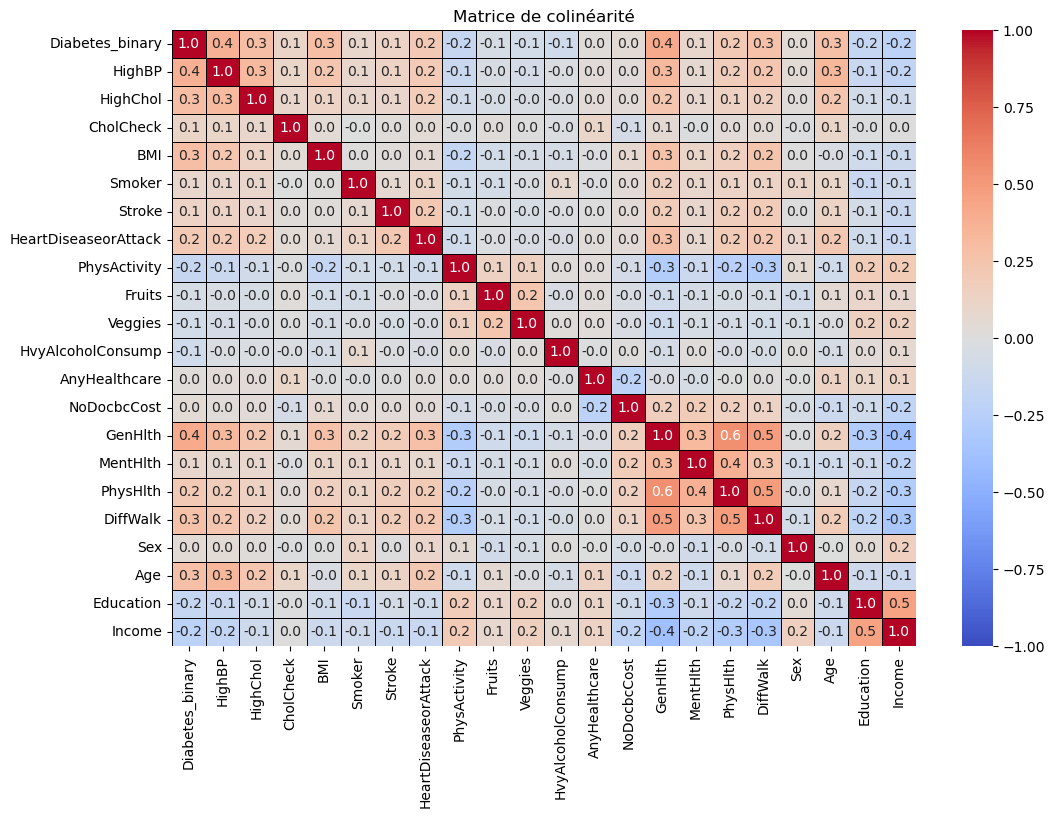

In [ ]:
#représente la matrice en mettant en rouge les valeurs positives (proche 1)
#et en bleu les négatives (proche -1)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".1f",
    linewidths=0.5,
    linecolor="black",
    vmin=-1,
    vmax=1
)
plt.title('Matrice de colinéarité')

###### Remarque: Manque de clarté.

Text(0.5, 1.0, 'Matrice de colinéarité (valeurs>0.5)')

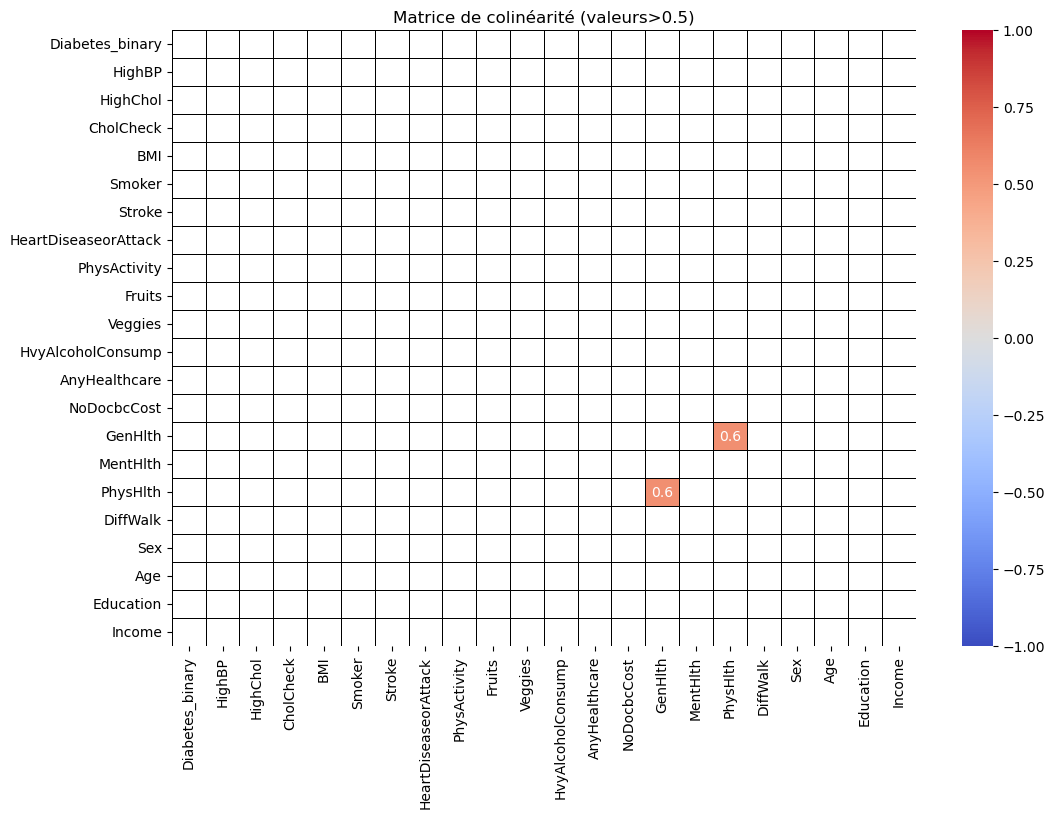

In [ ]:
#supprimer les valeurs basses qui ne nous intéressent pas.
corr_matrix[abs(corr_matrix)<0.5]=np.nan
#supprimer la diagonale
np.fill_diagonal(corr_matrix.values, np.nan)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
    vmin=-1,
    vmax=1,
    fmt=".1f"
)
plt.title('Matrice de colinéarité (valeurs>0.5)')

######  Conclusion: Pas de colinéarité importante dans le dataset, donc on peut garder toutes les colonnes.

# Visualisation des données

Text(0.5, 1.0, "Probabilité d'avoir du diabète en fonction du statut de fumeur")

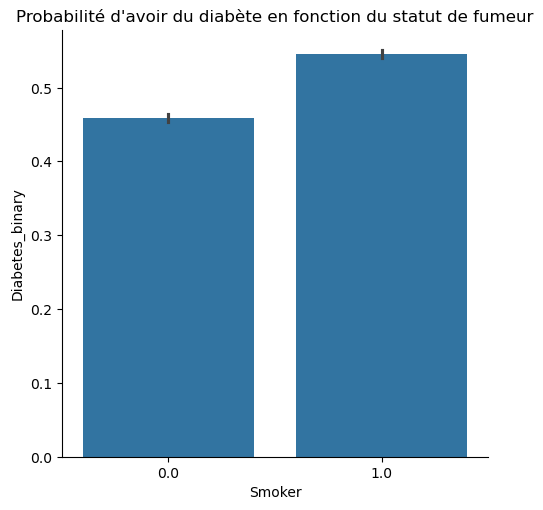

In [206]:
sns.catplot(x="Smoker", y="Diabetes_binary", data=df, kind="bar", errorbar=('ci', 95))
plt.title("Probabilité d'avoir du diabète en fonction du statut de fumeur")

Text(0.5, 1.0, "Probabilité d'avoir du diabète en fonction du choléstérol")

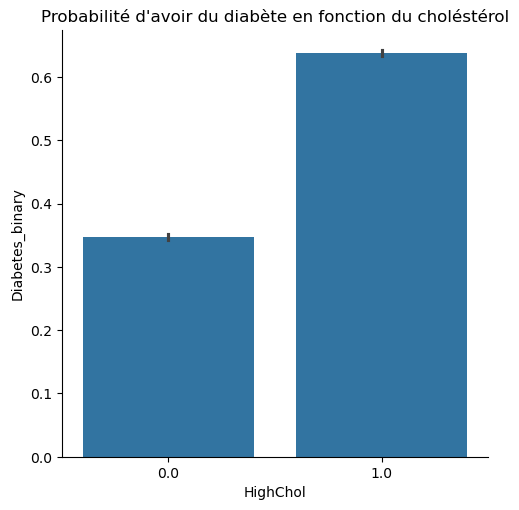

In [207]:
sns.catplot(x="HighChol", y="Diabetes_binary", data=df, kind="bar", errorbar=('ci', 95))
plt.title("Probabilité d'avoir du diabète en fonction du choléstérol")

Text(0.5, 1.0, "Probabilité d'avoir du diabète en fonction de la pression artérielle")

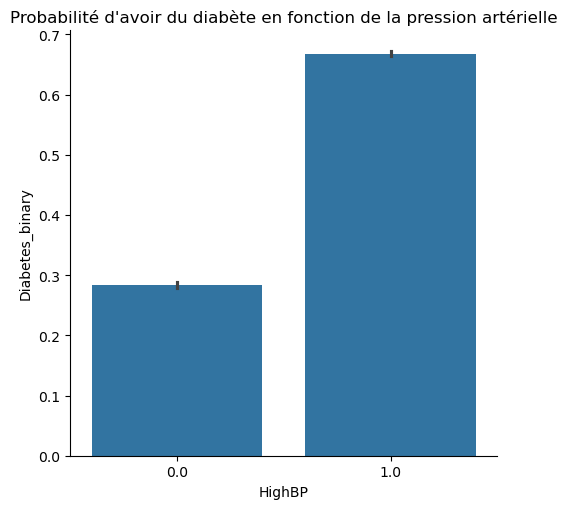

In [208]:
sns.catplot(x="HighBP", y="Diabetes_binary", data=df, kind="bar", errorbar=('ci', 95))
plt.title("Probabilité d'avoir du diabète en fonction de la pression artérielle")

# Preprocessing

### Segmenter le dataset en X et y

In [209]:
X=df.iloc[:, 1:]
y=df.iloc[:, 0:1]

### Exclusion de certaines variables

###### Les AVC (Stroke) sont des conséquences du diabète dues à une mauvaise circulation sanguine dans les artères cérébrales.
###### Les maladies cardiaques et infarctus (HeartDiseaseorAttack) sont 2 à 4 fois plus fréquentes chez les personnes vivant avec le diabète.
###### La santé globale perçue (GenHlth) se dégrade généralement avec le diabète et les maladies qui en découlent.
###### La santé mentale (MentHlth) est une potentielle conséquence du diabète et des maladies générées par le diabète. Dans le doute, on élimine cette colonne pour ne pas biaiser notre algorithme.
###### La santé physique (PhysHlth) se dégrade avec le diabète comme on le voit avec toutes les conséquences précédentes.
###### La difficulté à marcher (DiffWalk) peut être due à un taux de glycémie trop élevé qui endommage les nerfs. Ce sont principalement les longs nerfs qui alimentent les jambes qui sont touchés.

###### On supprime donc toutes ces colonnes.

In [210]:
X=X.copy()
X.drop('Stroke', axis=1, inplace=True)
X.drop('HeartDiseaseorAttack', axis=1, inplace=True)
X.drop('GenHlth', axis=1, inplace=True)
X.drop('MentHlth', axis=1, inplace=True)
X.drop('PhysHlth', axis=1, inplace=True)
X.drop('DiffWalk', axis=1, inplace=True)

### Vérification des cases vides

In [211]:
#aucune case vide
df.isnull().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

### Standardisation

In [212]:
std_scaler = StandardScaler()
col_names = X.columns

X=pd.DataFrame(std_scaler.fit_transform(X), columns=col_names)

### Fusion de certaines colonnes redondantes

In [213]:
X["Nutri_score"]=X[['Fruits', 'Veggies']].mean(axis=1)
X['ScoreSocioEco']=X[['Education', 'Income']].mean(axis=1)
X['AccessGlobalCare']=X[['AnyHealthcare', 'NoDocbcCost']].mean(axis=1)
X['ScoreMetabolique']=X[['HighBP', 'HighChol', 'BMI']].mean(axis=1)

### Suppression des colonnes fusionnées

In [214]:
X.drop('Fruits', axis=1, inplace=True)
X.drop('Veggies', axis=1, inplace=True)
X.drop('Education', axis=1, inplace=True)
X.drop('Income', axis=1, inplace=True)
X.drop('AnyHealthcare', axis=1, inplace=True)
X.drop('NoDocbcCost', axis=1, inplace=True)
X.drop('HighBP', axis=1, inplace=True)
X.drop('HighChol', axis=1, inplace=True)
X.drop('BMI', axis=1, inplace=True)

### Split des données

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement de l'algorithme

In [216]:
#s'assurer que les y sont bien des array et vecteur unidimensionnel.
y_train=y_train.to_numpy().ravel()
y_test=y_test.to_numpy().ravel()

In [217]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=6)
random_forest.fit(X_train, y_train)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# Evaluation de l'algorithme

In [218]:
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

Train score with decision tree (max_depth=5): 0.7211642176365534
Test score with decision tree (max_depth=5): 0.7185090883372233
Ecart entre train et test score : 0.0026551292993300946

Train score with random forest (n_estimator=100, max_depth=5): 0.7277421180131912
Test score with random forest (n_estimator=100, max_depth=5): 0.7279156941792206
Ecart entre train et test score : 0.00017357616602942105

Train score with logistic regression : 0.7258854525843015
Test score with logistic regression : 0.727208430582078
Ecart entre train et test score : 0.0013229779977764755


Text(0.5, 1.0, 'Matrice de confusion du test set')

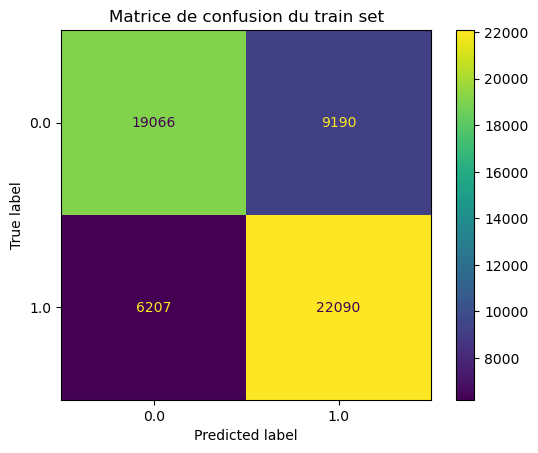

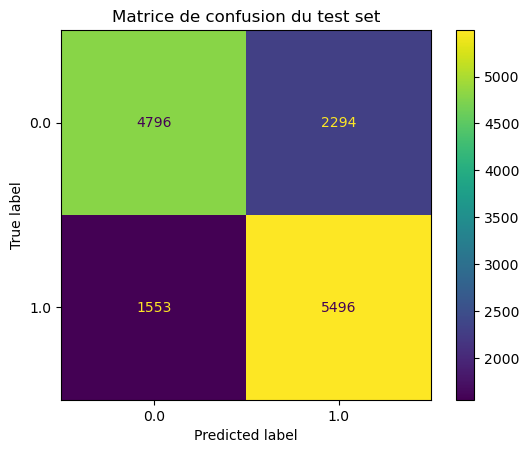

In [219]:
print("Train score with decision tree (max_depth=5):", decision_tree.score(X_train, y_train))
print("Test score with decision tree (max_depth=5):", decision_tree.score(X_test, y_test))
print("Ecart entre train et test score :", abs(decision_tree.score(X_train, y_train)-decision_tree.score(X_test, y_test)))
print("\nTrain score with random forest (n_estimator=100, max_depth=5):", random_forest.score(X_train, y_train))
print("Test score with random forest (n_estimator=100, max_depth=5):", random_forest.score(X_test, y_test))
print("Ecart entre train et test score :", abs(random_forest.score(X_train, y_train)-random_forest.score(X_test, y_test)))
print("\nTrain score with logistic regression :", classifier.score(X_train, y_train))
print("Test score with logistic regression :", classifier.score(X_test, y_test))
print("Ecart entre train et test score :", abs(classifier.score(X_train, y_train)-classifier.score(X_test, y_test)))

cm = confusion_matrix(y_train, y_pred_train, labels=random_forest.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
cm_display.ax_.set_title('Matrice de confusion du train set')
cm2 = confusion_matrix(y_test, y_pred_test, labels=random_forest.classes_)
cm2_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
cm2_display.ax_.set_title('Matrice de confusion du test set')

In [220]:
feature_importance = pd.DataFrame({
    'feature_name': X.columns,
    'coefficient': random_forest.feature_importances_
})
feature_importance

,feature_name,coefficient
0,CholCheck,0.018112
1,Smoker,0.003580
2,PhysActivity,0.033834
3,HvyAlcoholConsump,0.013055
4,Sex,0.009667
5,Age,0.189221
6,Nutri_score,0.004313
7,ScoreSocioEco,0.102625
8,AccessGlobalCare,0.002518
9,ScoreMetabolique,0.623074


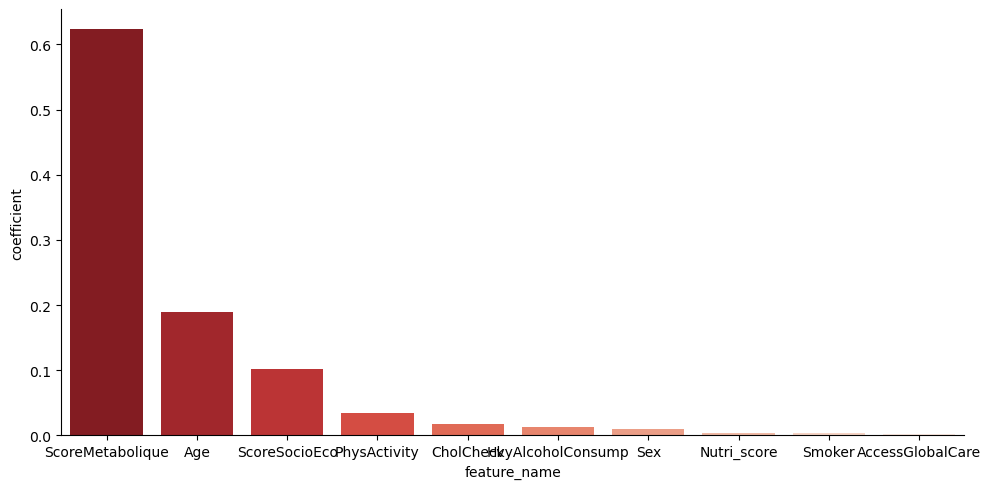

In [221]:
sns.catplot(
    x="feature_name",
    y='coefficient',
    data=feature_importance.sort_values(by="coefficient", ascending=False),
    kind="bar",
    hue='feature_name',
    palette='Reds_r',
    aspect=2
)

In [222]:
feature_importance_filtered = feature_importance[feature_importance['coefficient']>=0.1]
feature_importance_filtered

,feature_name,coefficient
5,Age,0.189221
7,ScoreSocioEco,0.102625
9,ScoreMetabolique,0.623074


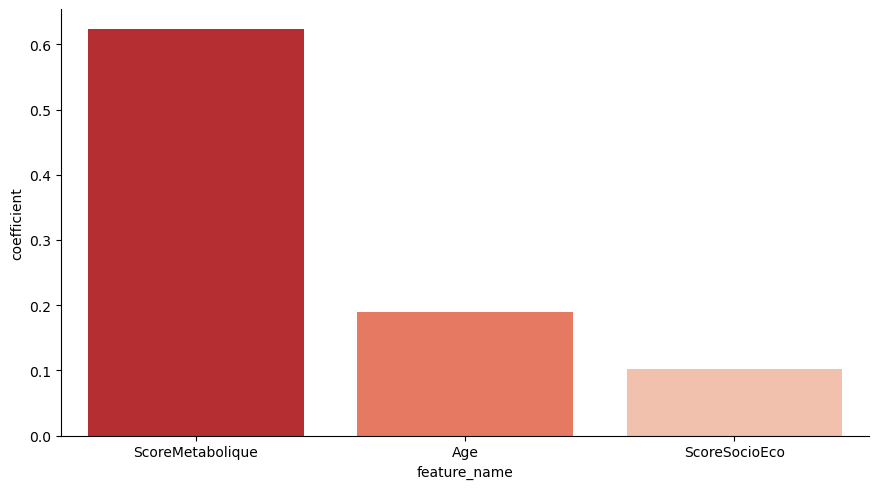

In [223]:
sns.catplot(
    x='feature_name',
    y='coefficient',
    data=feature_importance_filtered.sort_values(by='coefficient', ascending=False),
    kind='bar',
    hue="feature_name",
    palette='Reds_r',
    aspect=16/9
)